<a href="https://colab.research.google.com/github/lucasmvaladao/atividade-pandas/blob/main/atividade_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. **Leitura e Inspeção dos Dados**

In [ ]:
#Importando bibliotecas
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np, plotly.express as px
import plotly.io as pio

In [ ]:
#Importar do local
from google.colab import files
uploaded = files.upload()

Saving vgsales_a.csv to vgsales_a.csv


In [ ]:
#Importar do local
from google.colab import files
uploaded = files.upload()

Saving vgsales_b.csv to vgsales_b.csv


In [ ]:
import pandas as pd

# Carregue os arquivos CSV em DataFrames separados
df_a = pd.read_csv('/content/vgsales_a.csv')
df_b = pd.read_csv('/content/vgsales_b.csv')

# Combine os DataFrames em um único DataFrame
df_c = pd.concat([df_a , df_b], ignore_index=True)


In [ ]:
# Renomeie as colunas para português
df_c = df_c.rename(columns={
    'Rank': 'Posição',
    'Name': 'Nome',
    'Platform': 'Plataforma',
    'Year': 'Ano',
    'Genre': 'Gênero',
    'Publisher': 'Publicadora',
    'NA_Sales': 'Vendas_AMN',
    'EU_Sales': 'Vendas_EUR',
    'JP_Sales': 'Vendas_JPN',
    'Other_Sales': 'Outras_Vendas',
    'Global_Sales;': 'Vendas_Globais',
})

In [ ]:
# Exiba as primeiras 5 linhas do DataFrame combinado.
df_c.head(5)

,Posição,Nome,Plataforma,Ano,Gênero,Publicadora,Vendas_AMN,Vendas_EUR,Vendas_JPN,Outras_Vendas,Global_Sales;
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74;
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24;
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82;
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33;
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37;


In [ ]:
# Exiba informações gerais e estatísticas descritivas do DataFrame.
df_c.info()
df_c.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16597 entries, 0 to 16596
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Posição        16597 non-null  object 
 1   Nome           16474 non-null  object 
 2   Plataforma     16474 non-null  object 
 3   Ano            16205 non-null  float64
 4   Gênero         16474 non-null  object 
 5   Publicadora    16417 non-null  object 
 6   Vendas_AMN     16474 non-null  float64
 7   Vendas_EUR     16474 non-null  float64
 8   Vendas_JPN     16474 non-null  float64
 9   Outras_Vendas  16474 non-null  float64
 10  Global_Sales;  16474 non-null  object 
dtypes: float64(5), object(6)
memory usage: 1.4+ MB


,Ano,Vendas_AMN,Vendas_EUR,Vendas_JPN,Outras_Vendas
count,16205.000000,16474.000000,16474.000000,16474.000000,16474.000000
mean,2006.401851,0.265742,0.147347,0.078024,0.048283
std,5.841352,0.819540,0.507088,0.310186,0.189257
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000




---



# 2. **Análise Exploratória**

In [ ]:
# Selecionando colunas com ao menos um valor não nulo
colunas_com_dados = df_c.columns[df_c.notna().any()].tolist()

# Exibindo o resultado
print(colunas_com_dados)

['Posição', 'Nome', 'Plataforma', 'Ano', 'Gênero', 'Publicadora', 'Vendas_AMN', 'Vendas_EUR', 'Vendas_JPN', 'Outras_Vendas', 'Vendas_Globais']


###Conte a quantidade de jogos por plataforma

In [104]:
multiplatforms = df_c.groupby('Plataforma', as_index=False)['Nome'].nunique().sort_values('Nome', ascending=False)

multiplatforms


,Plataforma,Nome
16,PS2,2144
4,DS,2137
17,PS3,1321
26,Wii,1316
28,X360,1257
19,PSP,1200
15,PS,1192
13,PC,950
29,XB,820
6,GBA,807


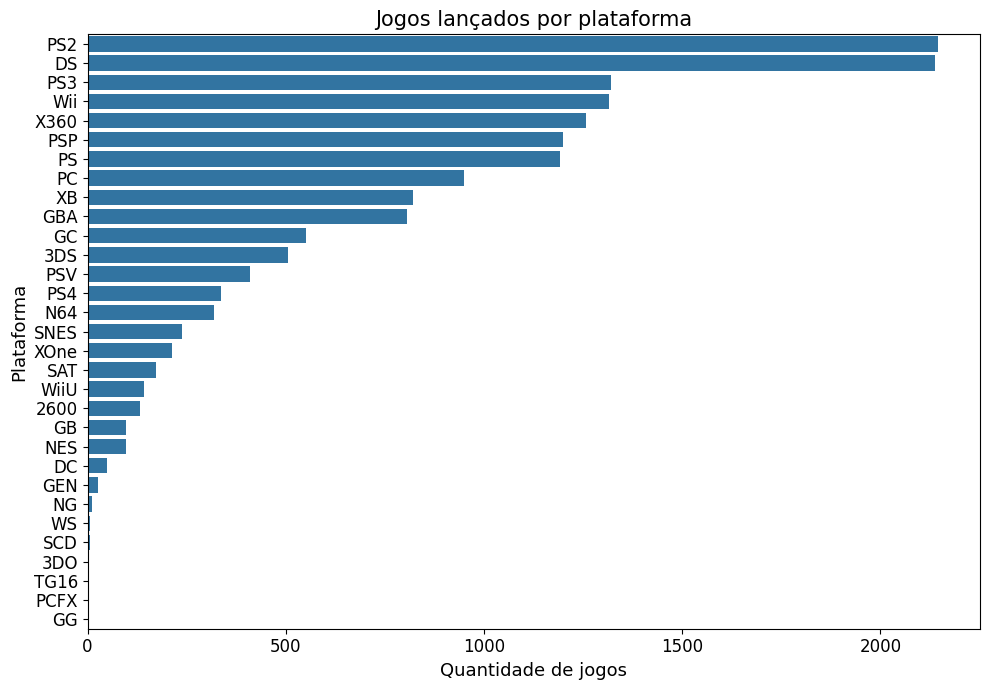

In [105]:
plt.figure(figsize=(10,7))
sns.barplot(y='Plataforma', x='Nome', data=multiplatforms)

plt.xlabel('Quantidade de jogos', size=13)
plt.ylabel('Plataforma', size=13)
plt.title('Jogos lançados por plataforma', size=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


### Calcule a média das vendas globais por plataforma.

In [ ]:
print(df_c['Vendas_Globais'].head())
print(df_c['Vendas_Globais'].dtype)


0    82.74;
1    40.24;
2    35.82;
3       33;
4    31.37;
Name: Vendas_Globais, dtype: object
object


In [ ]:
# Substituir vírgulas e ponto-e-vírgula se houver e converter para float
df_c['Vendas_Globais'] = df_c['Vendas_Globais'].str.replace(',', '.').str.split(';').str[0].astype(float)

In [ ]:
media_vendas = pd.DataFrame(df_c.groupby('Plataforma')[['Vendas_Globais']].mean().sort_values('Vendas_Globais', ascending = False))
media_vendas

,Vendas_Globais
Plataforma,
GB,2.606633
NES,2.561939
GEN,1.085385
SNES,0.837029
PS4,0.827679
X360,0.776677
2600,0.729925
PS3,0.722411
Wii,0.702134


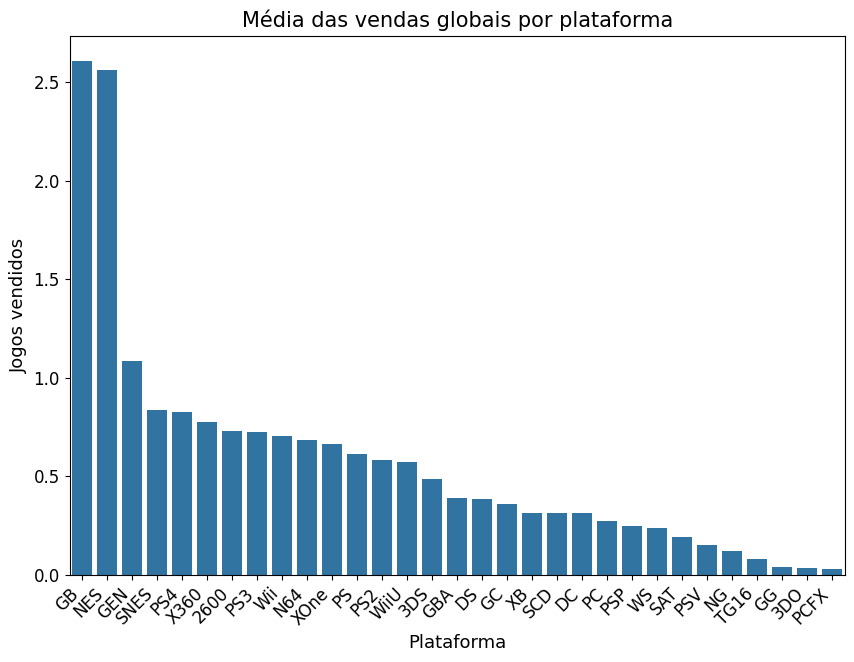

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(y = 'Vendas_Globais', x = 'Plataforma', data = media_vendas)
plt.ylabel('Jogos vendidos', size = 13)
plt.xlabel('Plataforma', size = 13)
plt.title('Média das vendas globais por plataforma', size = 15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.show()

### Conte a quantidade de jogos por gênero.

In [ ]:
multiplatforms = pd.DataFrame(df_c.groupby('Plataforma',as_index = False)['Nome'].count().sort_values(
    'Nome', ascending = False).head(10))
multiplatforms

In [ ]:
genplat = pd.DataFrame(df_c.groupby("Gênero", as_index=False)['Nome'].count().sort_values('Nome', ascending=False).head(10))
genplat

,Gênero,Nome
0,Action,3293
10,Sports,2340
3,Misc,1716
7,Role-Playing,1480
8,Shooter,1296
1,Adventure,1263
6,Racing,1246
4,Platform,878
9,Simulation,863
2,Fighting,847


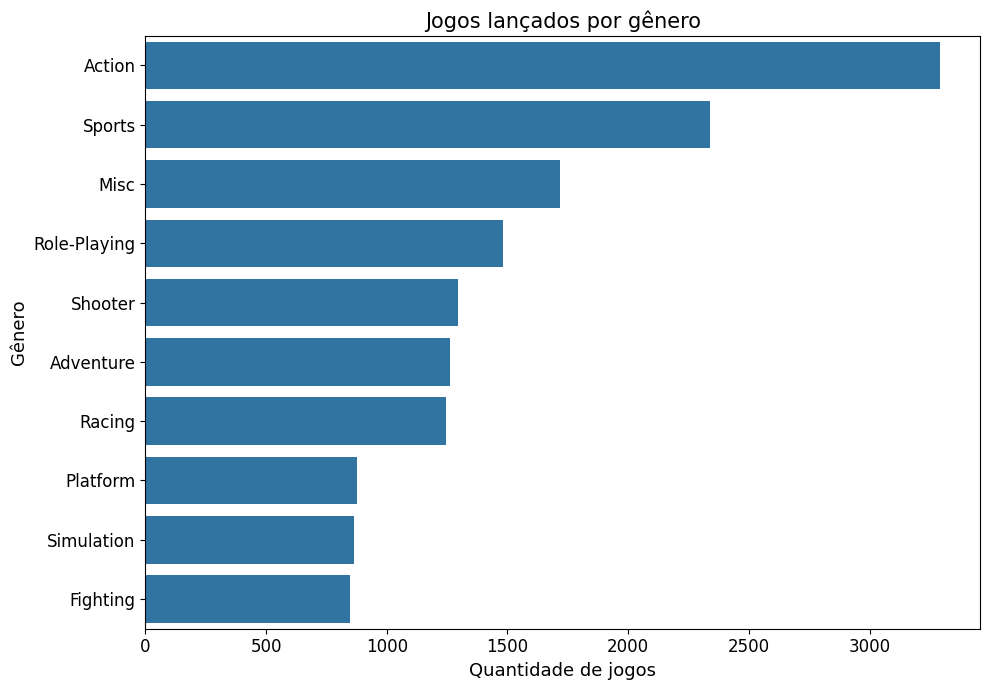

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(y='Gênero', x='Nome', data=genplat)

plt.xlabel('Quantidade de jogos', size=13)
plt.ylabel('Gênero', size=13)
plt.title('Jogos lançados por gênero', size=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()




---



# 3. **Filtragem de Dados**

### Filtre os jogos com vendas globais acima da média e conte quantos são.

In [ ]:
#Calculando a média de vendas globais
media_global = df_c['Vendas_Globais'].mean()

#Calculando a média de vendas globais por jogos
media_vendas_jogos = df_c.groupby('Nome')[['Vendas_Globais']].mean().sort_values('Vendas_Globais', ascending = False)

# Filtra os jogos que têm vendas globais acima da média
jogos_acima_media = df_c[df_c['Vendas_Globais'] > media_global][['Nome', 'Vendas_Globais']]

jogos_acima_media

,Nome,Vendas_Globais
0,Wii Sports,82.74
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.82
3,Wii Sports Resort,33.00
4,Pokemon Red/Pokemon Blue,31.37
...,...,...
3751,War of the Monsters,0.54
3752,Tales of Symphonia: Dawn of the New World,0.54
3753,NBA Street Vol. 2,0.54
3754,The Incredible Hulk: Ultimate Destruction,0.54


### Filtre os jogos lançados após o ano 2010 e calcule a média das vendas globais desses jogos.

In [103]:
# Filtra os jogos que têm vendas globais acima da média
jogos_acima_2010 = df_c[df_c['Ano'] > 2010]

media_jogos_acima_2010 = jogos_acima_2010['Vendas_Globais'].mean()
print(f"A média das vendas globais dos jogos lançados após 2010 é: {media_jogos_acima_2010}")


A média das vendas globais dos jogos lançados após 2010 é: 0.49568140677527806




---



# 4. **Operações Avançadas:**

### Adicione uma coluna ao DataFrame que calcule a soma das vendas na América do Norte e Europa

### Agrupe os dados por ano de lançamento e calcule a média das vendas globais.

In [101]:
# Anos com maiores números de vendas
media_vendas_por_ano = df_c.groupby('Ano')[['Vendas_Globais']].mean().sort_values('Vendas_Globais', ascending = False)
media_vendas_por_ano

,Vendas_Globais
Ano,
1989.0,4.320588
1985.0,3.852857
1984.0,3.597143
1988.0,3.148000
1990.0,3.086875
1992.0,1.771163
1986.0,1.765238
1987.0,1.358750
1980.0,1.264444
